# 증액 투자법

|레벨|스타일|기대CAGR|매수전략|매도전략|
|:--:|:--:|:--:|:--:|:--:|
|초급|자산배분|코스피 + 1~2%(20년 투자할 경우)|- 전체 자산을 3년채 국채에 투자<br/><br/>- 국채에서 나오는 투자 수익을 코스피 지수에 투자|없음|

# Load Dataset

## Import module

필요한 모듈을 임포트 해옵니다.

In [1]:
import pandas as pd
import requests
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Get Daily Prices

### GOV_3Y(daily)

국채3년물 상품을 네이버 금융에서 크롤링합니다. 크롬의 검사(Inspection) 기능을 사용해 개발자 도구를 열고 크롤링해오려는 데이터 표의 source URL을 먼저 변수로 지정합니다. 크롤링해온 일별 데이터를 ```gov_3``` 에 DataFrame으로 담습니다.

In [2]:
gov_3 = pd.DataFrame()
url = 'http://finance.naver.com/item/sise_day.nhn?code=114260'

for page in tqdm(range(1, 100)):
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    pg_url_req = requests.get(pg_url, headers={'User-agent': 'Mozilla/5.0'}).text
    gov_3 = gov_3.append(pd.read_html(pg_url_req, header=0)[0], ignore_index=True)
    
gov_3 = gov_3.dropna()
gov_3.columns = ['date', 'close', 'over the day', 'start', 'high', 'low', 'volume']
gov_3['date'] = pd.to_datetime(gov_3['date'])

print('출처 :', url)
gov_3.head()

100%|██████████| 99/99 [00:18<00:00,  5.25it/s]


출처 : http://finance.naver.com/item/sise_day.nhn?code=114260


,date,close,over the day,start,high,low,volume
1,2021-07-09,58015.0,25.0,58015.0,58055.0,57975.0,1069.0
2,2021-07-08,57990.0,70.0,57960.0,58015.0,57930.0,3646.0
3,2021-07-07,57920.0,55.0,57865.0,57920.0,57865.0,1406.0
4,2021-07-06,57865.0,20.0,57890.0,57890.0,57830.0,3484.0
5,2021-07-05,57885.0,95.0,57875.0,57895.0,57785.0,8717.0


In [3]:
gov_3.tail()

,date,close,over the day,start,high,low,volume
1479,2017-07-06,55455.0,0.0,55460.0,55465.0,55425.0,1594.0
1480,2017-07-05,55455.0,20.0,55475.0,55475.0,55435.0,972.0
1481,2017-07-04,55435.0,65.0,55480.0,55485.0,55435.0,1539.0
1482,2017-07-03,55500.0,10.0,55725.0,55725.0,55450.0,1730.0
1483,2017-06-30,55510.0,15.0,55510.0,55530.0,55475.0,1890.0


### KODEX 200(daily)

국채3년물과 마찬가지로 KODEX 200 일별 데이터를 네이버 금융에서 크롤링 해온 후, ```kodex_200``` 변수에 담습니다.

In [4]:
kodex_200 = pd.DataFrame()
url = 'http://finance.naver.com/item/sise_day.nhn?code=069500'
# url = 'http://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI'

for page in tqdm(range(1, 100)):
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    pg_url_req = requests.get(pg_url, headers={'User-agent': 'Mozilla/5.0'}).text
    kodex_200 = kodex_200.append(pd.read_html(pg_url_req, header=0)[0], ignore_index=True)
    
kodex_200 = kodex_200.dropna()
kodex_200.columns = ['date', 'close', 'over the day', 'start', 'high', 'low', 'volume']
# kodex_200.columns = ['date', 'close', 'over the day', 'up & down', 'volume(s)', 'volume(w)']
kodex_200['date'] = pd.to_datetime(kodex_200['date'])

print('출처 :', url)
kodex_200.head()

100%|██████████| 99/99 [00:14<00:00,  7.00it/s]

출처 : http://finance.naver.com/item/sise_day.nhn?code=069500


,date,close,over the day,start,high,low,volume
1,2021-07-09,42800.0,460.0,42840.0,43050.0,42445.0,7531991.0
2,2021-07-08,43260.0,455.0,43765.0,43875.0,43260.0,5209381.0
3,2021-07-07,43715.0,275.0,43840.0,43840.0,43605.0,3816728.0
4,2021-07-06,43990.0,200.0,43910.0,44100.0,43895.0,4009188.0
5,2021-07-05,43790.0,205.0,43770.0,43910.0,43710.0,2774715.0


In [5]:
kodex_200.tail()

,date,close,over the day,start,high,low,volume
1479,2017-07-06,31325.0,5.0,31395.0,31395.0,31240.0,6394300.0
1480,2017-07-05,31320.0,120.0,31125.0,31355.0,31115.0,5744072.0
1481,2017-07-04,31200.0,195.0,31405.0,31435.0,31165.0,8262663.0
1482,2017-07-03,31395.0,70.0,31395.0,31430.0,31260.0,6314386.0
1483,2017-06-30,31325.0,95.0,31220.0,31325.0,31190.0,10200611.0


# Turn to Monthly Data

월별 리밸런싱을 하기 위해 우리가 크롤링해온 일별 데이터를 월별 데이터로 바꾸겠습니다.

### KODEX 200 & GOV_3Y (monthly)

2010년 ~ 2019년까지, 1월 ~ 12월까지 ```for 반복문```을 사용해 해당 연|월의 말일 데이터만 필터링해 각각 ```kodex_monthly```, ```gov_monthly```에 담습니다.

In [6]:
kodex_monthly = pd.DataFrame()
gov_monthly = pd.DataFrame()
for i in tqdm(range(2010, 2022)):
    for j in range(1, 13):
        kodex_monthly = kodex_monthly.append(kodex_200[(kodex_200['date'].dt.year == i) & (kodex_200['date'].dt.month == j)].head(1))
        gov_monthly = gov_monthly.append(gov_3[(gov_3['date'].dt.year == i) & (gov_3['date'].dt.month == j)].head(1))
        
kodex_index = [x for x in range(len(kodex_monthly))]
kodex_monthly.index = kodex_index

gov_index = [x for x in range(len(gov_monthly))]
gov_monthly.index = gov_index

100%|██████████| 12/12 [00:00<00:00, 15.52it/s]


In [7]:
gov_monthly = gov_monthly.sort_values(by='date')
gov_monthly.head()

,date,close,over the day,start,high,low,volume
0,2017-06-30,55510.0,15.0,55510.0,55530.0,55475.0,1890.0
1,2017-07-31,55570.0,0.0,55550.0,55580.0,55540.0,1368.0
2,2017-08-31,55610.0,60.0,55595.0,55610.0,55565.0,32871.0
3,2017-09-29,55320.0,15.0,55305.0,55320.0,55285.0,6904.0
4,2017-10-31,54975.0,5.0,54830.0,54990.0,54830.0,2715.0


In [8]:
kodex_monthly = kodex_monthly.sort_values(by='date')
kodex_monthly.head()

,date,close,over the day,start,high,low,volume
0,2017-06-30,31325.0,95.0,31220.0,31325.0,31190.0,10200611.0
1,2017-07-31,31460.0,0.0,31320.0,31510.0,31305.0,11381687.0
2,2017-08-31,30810.0,190.0,31025.0,31060.0,30745.0,7255256.0
3,2017-09-29,31700.0,245.0,31470.0,31700.0,31470.0,9891922.0
4,2017-10-31,33375.0,330.0,33050.0,33460.0,33000.0,18472117.0


# Backtest

In [9]:
def backtest(beginning_cash=100000): # 최초 금액은 $100,000로 시작합니다.
    asset = [] # 최종적으로 반환할 월별 자산 데이터가 담길 리스트를 선언합니다.
    kodex_shares = 0 # 첫 시점에서 KODEX 주식수는 0주입니다.
    
    for i in range(len(gov_monthly)-1): # 월별 데이터의 개수만큼 반복하면서,
        gov_shares = beginning_cash / gov_monthly.iloc[i].close # i번째 회차에 투자해야 할 국채3년물 주식수를 구합니다.
        gov_ending = gov_monthly.iloc[i+1].close * gov_shares # 위에서 구한 주식 수에 i+1번째 회차의 국채3년물 주가를 곱해 자산가치를 구합니다.
        
        # 국채3년물 투자금의 기초자산 대비 추가수익률을 구합니다.
        surplus = gov_ending - beginning_cash
        if surplus > 0: # 수익이 발생했다면,
            kodex_shares += surplus / kodex_monthly.iloc[i+1].close # 추가적으로 발생한 수익금으로 매수가능한 KODEX 주식수를 계산합니다. 
        elif surplus < 0: # 손실이 발생했다면,
            beginning_cash += surplus # 최초 투자금에서 해당 손실만큼 차감해줍니다.
        
        total = beginning_cash + (kodex_monthly.iloc[i+1].close * kodex_shares) # 해당시점 초기자금과 매수한 주식금액을 합산해 최종 자산을 구합니다.
        asset.append(total) # 총 자산가치를 asset 리스트에 담습니다.
        beginning_cash = 100000 # 최초 자산을 다시 설정합니다.
    
    # asset 리스트 가장 처음에 비어있는 $100,000를 해당 위치에 담아둡니다.
    asset.insert(0, 100000.0)
    # 최종적으로 asset을 반환합니다.
    return asset

In [10]:
back_test = {
    'date' : kodex_monthly['date'],
    'backtest' : backtest(),
    'kodex 200' : kodex_monthly['close'] / kodex_monthly.iloc[0].close * 100000,
    'gov 3Y' : gov_monthly['close'] / gov_monthly.iloc[0].close * 100000
}

back_test = pd.DataFrame(back_test, columns = ['date', 'backtest', 'kodex 200','gov 3Y'])
back_test.head()

,date,backtest,kodex 200,gov 3Y
0,2017-06-30,100000.000000,100000.000000,100000.000000
1,2017-07-31,100108.088633,100430.965682,100108.088633
2,2017-08-31,100177.836681,98355.945730,100180.147721
3,2017-09-29,100182.973801,101197.126895,99657.719330
4,2017-10-31,100192.641975,106544.293695,99036.209692


# Visualization

시각화를 위한 새로운 모듈을 임포트 합니다. 

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

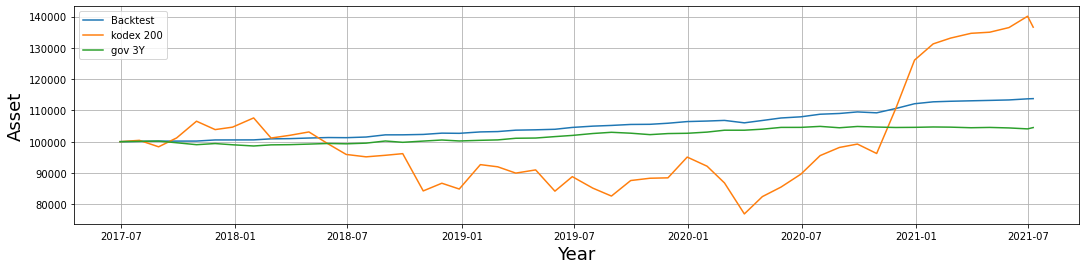

In [12]:
plt.figure(figsize=(18, 4))
plt.plot(back_test['date'], back_test['backtest'], label='Backtest')
plt.plot(back_test['date'], back_test['kodex 200'], label='kodex 200')
plt.plot(back_test['date'], back_test['gov 3Y'], label='gov 3Y')

plt.legend(loc='best')
plt.xlabel("Year", fontsize=18)
plt.ylabel("Asset", fontsize=18)
plt.grid()
plt.show()

# Compute CAGR

각 자산별 Compounded Annual Growth Rate를 계산해보겠습니다.

### backtest

In [13]:
result = backtest()
begin, end = result[0], result[-1]

cagr = ((end / begin)**(1/len(set(kodex_200['date'].dt.year))) - 1) * 100
print('%.2f'%cagr, '%')

2.61 %


### kodex 200

In [14]:
end, begin = kodex_200.iloc[0].close, kodex_200.iloc[-1].close

kodex_cagr = ((end / begin)**(1/len(set(kodex_200['date'].dt.year))) - 1) * 100
print('%.2f'%kodex_cagr, '%')

6.44 %


### gov 3Y

In [15]:
end, begin = gov_3.iloc[0].close, gov_3.iloc[-1].close

gov3_cagr = ((end / begin)**(1/len(set(gov_3['date'].dt.year))) - 1) * 100
print('%.2f'%gov3_cagr, '%')

0.89 %


# Copute Statistics

```numpy``` 모듈을 사용해 통계치를 계산합니다.

In [16]:
import numpy as np

# Numpy를 사용해 표준편차와 평균을 구합니다.
(np.std(back_test) / np.mean(back_test)) * 100

backtest      4.153390
kodex 200    16.399487
gov 3Y        2.118748
dtype: float64

```diff```를 사용해 매월 자산액의 차이를 계산한 후 전월대비 수익률을 계산합니다.

In [17]:
for i in tqdm(range(len(back_test)-1)):
    back_test["RoR"] = (back_test["backtest"].diff() / back_test.iloc[i]['backtest'])*100
    back_test['KOSPI_RoR'] = (back_test['kodex 200'].diff() / back_test.iloc[i]['kodex 200'])*100
    back_test['GOV_RoR'] = (back_test['gov 3Y'].diff() / back_test.iloc[i]['gov 3Y'])*100
back_test.fillna(0, inplace=True)
back_test.head()

100%|██████████| 49/49 [00:00<00:00, 393.41it/s]


,date,backtest,kodex 200,gov 3Y,RoR,KOSPI_RoR,GOV_RoR
0,2017-06-30,100000.000000,100000.000000,100000.000000,0.000000,0.000000,0.000000
1,2017-07-31,100108.088633,100430.965682,100108.088633,0.095061,0.307552,0.103842
2,2017-08-31,100177.836681,98355.945730,100180.147721,0.061341,-1.480806,0.069228
3,2017-09-29,100182.973801,101197.126895,99657.719330,0.004518,2.027566,-0.501904
4,2017-10-31,100192.641975,106544.293695,99036.209692,0.008503,3.815924,-0.597092


수익률의 표준편차를 계산합니다.

In [18]:
(np.std(back_test) / np.mean(back_test)) * 100

backtest       4.153390
kodex 200     16.399487
gov 3Y         2.118748
RoR          132.958103
KOSPI_RoR    676.516756
GOV_RoR      365.479309
dtype: float64

수익률의 표준편차가 최대치가 되는 시점을 찾습니다.

In [19]:
back_test[back_test['RoR'] == max(back_test['RoR'])].date, max(back_test['RoR'])

(42   2020-12-30
 Name: date, dtype: datetime64[ns],
 1.3343624631953714)

수익률의 표준편차가 최소치가 되는 시점을 찾습니다.

In [20]:
back_test[back_test['RoR'] == min(back_test['RoR'])].date, min(back_test['RoR'])

(33   2020-03-31
 Name: date, dtype: datetime64[ns],
 -0.6832017384545017)

백테스트 수익률 분포를 히스토그램으로 나타냅니다.

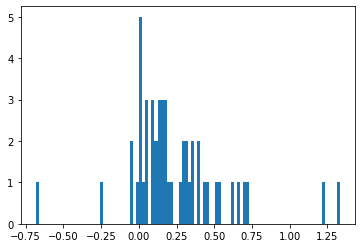

In [21]:
plt.hist(back_test['RoR'], bins=100)
plt.show()

KODEX 수익률 분포를 히스토그램으로 나타냅니다.

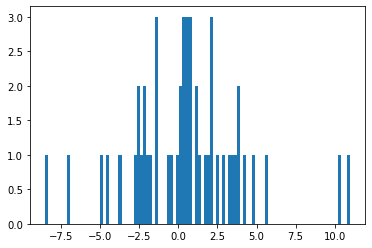

In [22]:
plt.hist(back_test['KOSPI_RoR'], bins=100)
plt.show()

국채3년물 수익률 분포를 히스토그램으로 나타냅니다.

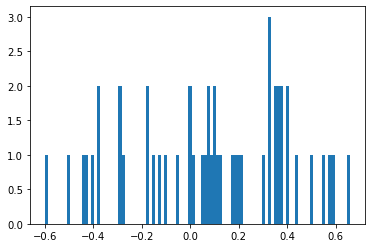

In [23]:
plt.hist(back_test['GOV_RoR'], bins=100)
plt.show()